In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X = pd.get_dummies(X, drop_first=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

In [6]:
rf_model = RandomForestClassifier(class_weight='balanced')

In [ ]:
recall_scorer = make_scorer(recall_score, pos_label='Yes')

param_grid = {
    'n_estimators': [100, 200, 300],   
    'criterion': ['gini'],   
    'max_depth': [None, 2, 5],         
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]              
}

grid_model = GridSearchCV(rf_model, param_grid=param_grid, scoring=recall_scorer, cv=5)

In [ ]:
grid_model.fit(X_train, y_train)

In [9]:
grid_model.best_params_ 

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [11]:
y_pred = grid_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.74      0.81       517
         Yes       0.52      0.79      0.63       187

    accuracy                           0.75       704
   macro avg       0.71      0.76      0.72       704
weighted avg       0.80      0.75      0.76       704



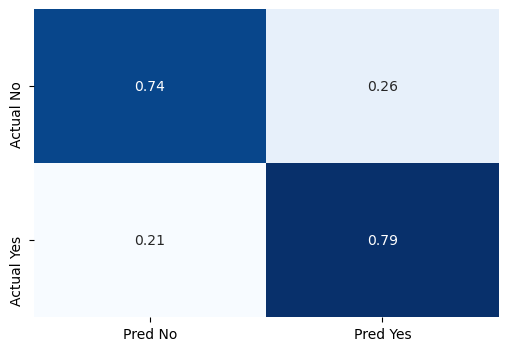

In [15]:
cm_normalize = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'], normalize='true')

cm_df = pd.DataFrame(cm_normalize,
                     index=['Actual No', 'Actual Yes'],
                     columns=['Pred No', 'Pred Yes'])

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)

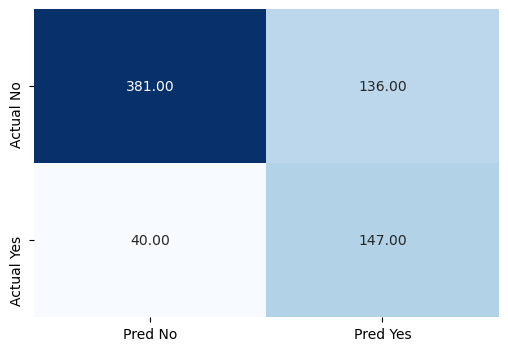

In [16]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index=['Actual No', 'Actual Yes'],
                     columns=['Pred No', 'Pred Yes'])

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)

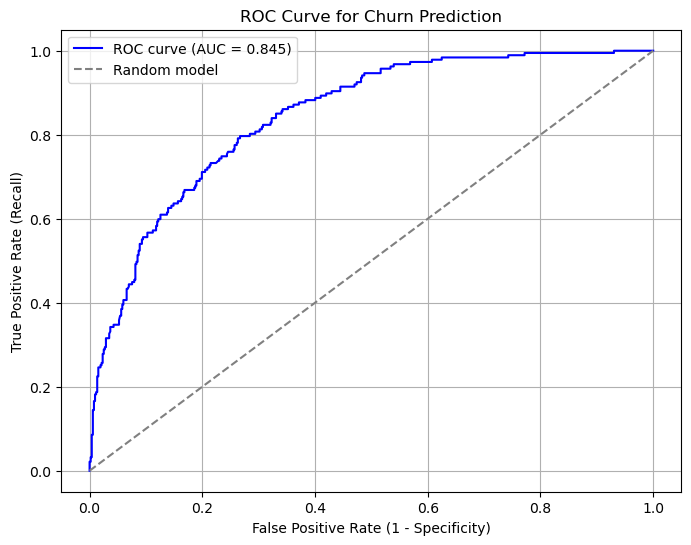

AUC Score: 0.845


In [17]:
y_proba = grid_model.best_estimator_.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='Yes')

auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Churn Prediction')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.3f}")